In [2]:
import pandas as pd
import csv
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
def load_csv():
    with open("inp.txt","r") as csvfile:
        lines=csv.reader(csvfile)
        data=list(lines)
        for i in range(len(data)):
            data[i]=[float(x) for x in data[i]]
    return np.array(data)
        

In [14]:
def norm(x):
    min_x=np.min(x)
    max_x=np.max(x)
    rng=max_x-min_x
    norm_x=1-((max_x-x)/rng)
    return norm_x



In [16]:
def log_func(x,beta):
    return (1.0/(1+np.exp(-np.dot(x,beta.T))))

In [45]:
def diffrential_costfunc(x,y,beta):
    first_calc=log_func(x,beta)-y.reshape(x.shape[0],-1)
    final_calc=np.dot(first_calc.T,x)
    return final_calc

In [46]:
def cost_func(x,y,beta):
    log_func_v=log_func(x,beta)
    y=np.squeeze(y)
    step1=y*np.log(log_func_v)
    step2=y*np.log(log_func_v)
    final=-step1-step2
    return np.mean(final)

In [47]:
def grad_desc(x,y,beta,lr=0.01,conv_change=0.001):
    cost=cost_func(x,y,beta)
    change_cost=1
    num_iter=1
    while(change_cost>conv_change):
        old_cost=cost_func(x,y,beta)
        beta=beta-(lr*diffrential_costfunc(x,y,beta))
        cost=cost_func(x,y,beta)
        change_cost=old_cost-cost
        num_iter+=1
    return beta,num_iter    

In [60]:
def pred_values(beta,x):
    pred_prob=log_func(x,beta)
    pred_y=np.where(pred_prob>=0.5,1,0)
    return np.squeeze(pred_y)

In [109]:
def plot_reg(x,y,beta):
    x_0=x[np.where(y==0.0)]
    x_1=x[np.where(y==1.0)]
    plt.scatter([x_0[:,1]],[x_0[:,2]],c='b',label='y=0')
    plt.scatter([x_1[:,1]],[x_1[:,2]],c='r',label='y=1')
    x1=np.arange(0,1,0.1)
    x2=-(beta[0,0]+x1*beta[0,1])/beta[0,2]
    plt.plot(x1,x2,c='k',label='reg line')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [110]:
data=load_csv()

In [111]:
x=norm(data[:,:-1])

In [112]:
x=np.hstack((np.matrix(np.ones(x.shape[0])).T,x))

In [113]:
y=data[:,-1]

In [114]:
beta=np.matrix(np.zeros(x.shape[1]))

In [115]:
beta,num_iter=grad_desc(x,y,beta)

In [116]:
print("Estimated coefficient :",beta)

Estimated coefficient : [[-9.61887002 10.82792102 10.4445626 ]]


In [117]:
print("number of Iteration:",num_iter)

number of Iteration: 1681


In [118]:
pred_y=pred_values(beta,x)

In [119]:
print("correctly predict labels",np.sum(y==pred_y))

correctly predict labels 89


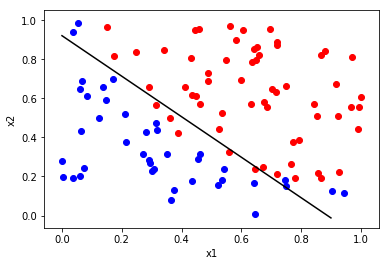

In [120]:
plot_reg(x,y,beta)